RUSHIKESH SANJIV TANKSALE.
712222014 Deep Learning 2022-23 SEM II.

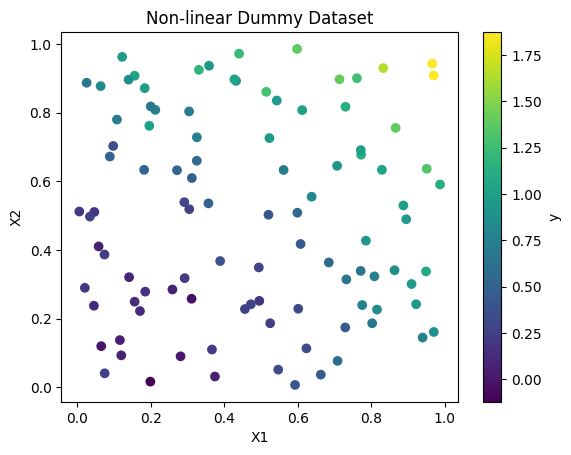

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Number of data points
num_samples = 100

# Generate random values for features X1 and X2
X1 = np.random.rand(num_samples)
X2 = np.random.rand(num_samples)

# Define a non-linear relationship to generate the target variable y
y = X1**2 + X2**2 + 0.1 * np.random.randn(num_samples)

# Visualize the dataset
plt.scatter(X1, X2, c=y, cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.colorbar(label='y')
plt.title('Non-linear Dummy Dataset')
plt.show()


In [6]:
import numpy as np

class FFNetworkSingle:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate

        # Initialize weights and biases randomly
        self.weights_hidden = np.random.randn(self.input_dim, self.hidden_dim)
        self.bias_hidden = np.zeros(self.hidden_dim)
        self.weights_output = np.random.randn(self.hidden_dim, self.output_dim)
        self.bias_output = np.zeros(self.output_dim)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward(self, X):
        # Hidden layer activation
        hidden_activation = np.dot(X, self.weights_hidden) + self.bias_hidden
        hidden_output = self.sigmoid(hidden_activation)

        # Output layer activation (linear activation for regression)
        output_activation = np.dot(hidden_output, self.weights_output) + self.bias_output

        return output_activation

    def compute_loss(self, y_true, y_pred):
        # Mean Squared Error loss function
        return np.mean((y_true - y_pred)**2)

    def backward(self, X, y_true, y_pred):
        # Compute gradients for the output layer
        output_gradient = 2 * (y_pred - y_true) / len(y_true)
        weights_output_gradient = np.dot(self.hidden_output.T, output_gradient)
        bias_output_gradient = np.sum(output_gradient, axis=0)

        # Compute gradients for the hidden layer
        hidden_gradient = np.dot(output_gradient, self.weights_output.T) * self.hidden_output * (1 - self.hidden_output)
        weights_hidden_gradient = np.dot(X.T, hidden_gradient)
        bias_hidden_gradient = np.sum(hidden_gradient, axis=0)

        return weights_hidden_gradient, bias_hidden_gradient, weights_output_gradient, bias_output_gradient

    def train(self, X, y, epochs=1000):
        for epoch in range(epochs):
            # Forward pass
            self.hidden_output = self.sigmoid(np.dot(X, self.weights_hidden) + self.bias_hidden)
            y_pred = np.dot(self.hidden_output, self.weights_output) + self.bias_output

            # Compute loss
            loss = self.compute_loss(y, y_pred)

            # Backward pass and update weights and biases
            gradients = self.backward(X, y, y_pred)
            self.weights_hidden -= self.learning_rate * gradients[0]
            self.bias_hidden -= self.learning_rate * gradients[1]
            self.weights_output -= self.learning_rate * gradients[2]
            self.bias_output -= self.learning_rate * gradients[3]

            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        print("Training completed!")

    def predict(self, X):
        return self.forward(X)

# Dummy dataset
X = np.column_stack((X1, X2))
y = y.reshape(-1, 1)

# Initialize and train the FeedForwardNetwork
input_dim = 2
hidden_dim = 5
output_dim = 1
learning_rate = 0.01
ff_net = FFNetworkSingle(input_dim, hidden_dim, output_dim, learning_rate)
ff_net.train(X, y, epochs=1000)

# Make predictions on new data points
new_X = np.array([[0.8, 0.6], [0.3, 0.1]])
predictions = ff_net.predict(new_X)
print("Predictions for new data:")
print(predictions)


Epoch 0, Loss: 8.8196
Epoch 100, Loss: 0.1859
Epoch 200, Loss: 0.1422
Epoch 300, Loss: 0.1111
Epoch 400, Loss: 0.0888
Epoch 500, Loss: 0.0729
Epoch 600, Loss: 0.0614
Epoch 700, Loss: 0.0531
Epoch 800, Loss: 0.0471
Epoch 900, Loss: 0.0426
Training completed!
Predictions for new data:
[[0.96042864]
 [0.21348744]]
